In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [3]:
file = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\wine_quality_prediction\wine_quality_prediction.csv")

In [4]:
file.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.36,0.09,16.0,0.039,26.0,110,0.996,3.36,0.68,11.0,3
1,7.8,0.29,0.09,20.0,0.045,25.0,100,0.995,3.26,0.65,9.8,3
2,7.5,0.26,0.10,13.5,0.041,23.0,95,0.994,3.48,0.65,10.5,6
3,7.3,0.26,0.10,20.0,0.045,25.0,105,0.994,3.38,0.65,9.5,6
4,6.0,0.28,0.10,12.0,0.039,26.0,100,0.995,3.36,0.65,10.5,5


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         58 non-null     float64
 1   volatile_acidity      58 non-null     float64
 2   citric_acid           58 non-null     float64
 3   residual_sugar        58 non-null     float64
 4   chlorides             58 non-null     float64
 5   free_sulfur_dioxide   58 non-null     float64
 6   total_sulfur_dioxide  58 non-null     int64  
 7   density               58 non-null     float64
 8   pH                    58 non-null     float64
 9   sulphates             58 non-null     float64
 10  alcohol               58 non-null     float64
 11  quality               58 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 5.6 KB


In [68]:
file.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,9.555172,5.301034,0.356379,7.853448,5.469328,13.987931,71.603448,65.722017,2.095862,4.266552,4.444828,5.672414
std,3.038535,5.043724,0.333060,8.168365,7.218483,15.701879,56.503047,67.762163,1.161025,4.074465,4.458824,1.160580
min,5.400000,0.210000,0.000000,0.200000,0.038000,0.020000,10.000000,0.994000,1.000000,0.650000,0.400000,3.000000
25%,6.825000,0.292500,0.100000,0.600000,0.045000,0.150000,21.250000,0.995000,1.020000,0.700000,0.625000,5.000000
50%,10.100000,6.600000,0.250000,0.800000,1.500000,0.200000,40.000000,60.000000,1.050000,3.500000,0.900000,6.000000
75%,12.000000,9.875000,0.700000,15.750000,9.000000,26.000000,105.000000,120.000000,3.320000,3.800000,10.325000,6.000000
max,15.000000,14.000000,1.000000,21.000000,25.000000,46.000000,187.000000,200.000000,3.480000,13.000000,11.000000,8.000000


In [6]:
file.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
x = file[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = file['quality']

TRAIN TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.6)

Creating and training Model

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
print(lr.intercept_)

13.918794689665283


In [12]:
coeff_ = pd.DataFrame(lr.coef_, x.columns,columns = ['Coefficients'])
coeff_

,Coefficients
fixed_acidity,-0.325383
volatile_acidity,0.257729
citric_acid,4.588112
residual_sugar,0.348442
chlorides,-0.206532
free_sulfur_dioxide,-0.177485
total_sulfur_dioxide,-0.010230
density,-0.055395
pH,2.794735
sulphates,-0.572310


In [13]:
pred = lr.predict(x_test)

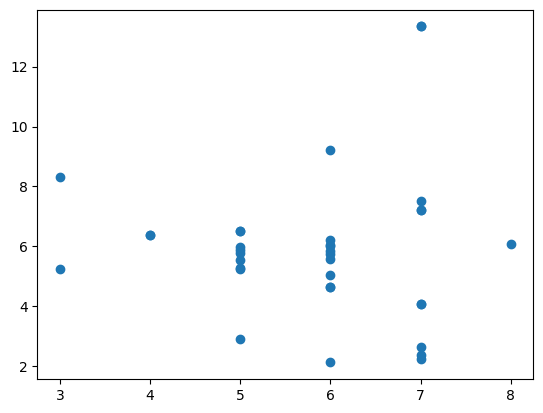

In [14]:
plt.scatter(y_test, pred)

In [15]:
from sklearn import metrics

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.9459526469443955
MSE: 7.168220611758216
RMSE: 2.677353284824066
